## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/jack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data

In [4]:
# Full Data
network_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_network_data.csv')
medicine_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_medicine_and_research_data.csv')
media_data = pd.read_csv('../labelled_data/pruned_topic_sentiment_media_data.csv')

In [5]:
network_data = network_data[network_data['topic_number'] != -1]
medicine_data = medicine_data[medicine_data['topic_number'] != -1]
media_data = media_data[media_data['topic_number'] != -1]

## Storing Topics

In [6]:
topics = network_data['topic_words'].value_counts()

In [7]:
medicine_topics = medicine_data['topic_words'].value_counts()

In [8]:
media_topics = media_data['topic_words'].value_counts()

## Saving Dataframes

In [9]:
topics.to_csv('../labelled_data/organized_topics/organized_network_topics.csv')
medicine_topics.to_csv('../labelled_data/organized_topics/organized_medicine_topics.csv')
media_topics.to_csv('../labelled_data/organized_topics/organized_media_topics.csv')

## Importing Manually Edited Dataframes

In [10]:
network_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_network_topics.xlsx')
medicine_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_medicine_topics.xlsx')
media_organized_data = pd.read_excel('../labelled_data/organized_topics/organized_media_topics.xlsx')

## Building Dataframes with Themes

### Network Data

In [11]:
# Building dataframe
network_organized_data_grouped = network_organized_data.groupby(['theme', 'sub-theme'])['count'].sum().reset_index()

network_organized_data_df = network_organized_data_grouped.groupby('theme')['count'].sum().reset_index()
network_organized_data_df['sub-theme'] = 'all'

network_organized_data_df = pd.concat([network_organized_data_grouped, network_organized_data_df], ignore_index=True)

network_organized_data_df = network_organized_data_df.sort_values(by=['theme', 'sub-theme']).reset_index(drop=True)

In [12]:
# Sorting themes in dataframe
network_organized_data_df = network_organized_data_df.sort_values(by=['theme', 'sub-theme'])

network_organized_data_df['all_value'] = network_organized_data_df.groupby('theme')['count'].transform(lambda x: x[network_organized_data_df['sub-theme'] == 'all'].max())

network_organized_data_df = network_organized_data_df.sort_values(by='all_value', ascending=False).drop(columns=['all_value'])

In [13]:
# Sorting sub-themes in dataframe
network_organized_data_df = network_organized_data_df.sort_values(by=['theme', 'count'], ascending=[True, False])

network_organized_data_df['is_all'] = network_organized_data_df['sub-theme'] == 'all'

theme_order = network_organized_data_df[network_organized_data_df['is_all']].sort_values(by='count', ascending=False).set_index('theme')['count']

network_organized_data_df['theme_order'] = network_organized_data_df['theme'].map(theme_order)
network_organized_data_df = network_organized_data_df.sort_values(by=['theme_order', 'is_all', 'count'], ascending=[False, False, False])

network_organized_data_df = network_organized_data_df.drop(columns=['is_all', 'theme_order'])

network_organized_data_df = network_organized_data_df.reset_index(drop=True)

In [16]:
network_organized_data_df.head(60)

,theme,sub-theme,count
0,vaccine,all,4911
1,vaccine,equity,1223
2,vaccine,hesitancy,1060
3,vaccine,support,822
4,vaccine,canada,579
5,vaccine,israel,434
6,vaccine,mrna,344
7,vaccine,america,188
8,vaccine,china,79
9,vaccine,general,65


### Medicine Data

In [95]:
# Building dataframe
medicine_organized_data_grouped = medicine_organized_data.groupby(['theme', 'sub-theme'])['count'].sum().reset_index()

medicine_organized_data_df = medicine_organized_data_grouped.groupby('theme')['count'].sum().reset_index()
medicine_organized_data_df['sub-theme'] = 'all'

medicine_organized_data_df = pd.concat([medicine_organized_data_grouped, medicine_organized_data_df], ignore_index=True)

medicine_organized_data_df = medicine_organized_data_df.sort_values(by=['theme', 'sub-theme']).reset_index(drop=True)

In [96]:
# Sorting themes in dataframe
medicine_organized_data_df = medicine_organized_data_df.sort_values(by=['theme', 'sub-theme'])

medicine_organized_data_df['all_value'] = medicine_organized_data_df.groupby('theme')['count'].transform(lambda x: x[medicine_organized_data_df['sub-theme'] == 'all'].max())

medicine_organized_data_df = medicine_organized_data_df.sort_values(by='all_value', ascending=False).drop(columns=['all_value'])

In [97]:
# Sorting sub-themes in dataframe
medicine_organized_data_df = medicine_organized_data_df.sort_values(by=['theme', 'count'], ascending=[True, False])

medicine_organized_data_df['is_all'] = medicine_organized_data_df['sub-theme'] == 'all'

theme_order = medicine_organized_data_df[medicine_organized_data_df['is_all']].sort_values(by='count', ascending=False).set_index('theme')['count']

medicine_organized_data_df['theme_order'] = medicine_organized_data_df['theme'].map(theme_order)
medicine_organized_data_df = medicine_organized_data_df.sort_values(by=['theme_order', 'is_all', 'count'], ascending=[False, False, False])

medicine_organized_data_df = medicine_organized_data_df.drop(columns=['is_all', 'theme_order'])

medicine_organized_data_df = medicine_organized_data_df.reset_index(drop=True)

### Media Data

In [98]:
# Building dataframe
media_organized_data_grouped = media_organized_data.groupby(['theme', 'sub-theme'])['count'].sum().reset_index()

media_organized_data_df = media_organized_data_grouped.groupby('theme')['count'].sum().reset_index()
media_organized_data_df['sub-theme'] = 'all'

media_organized_data_df = pd.concat([media_organized_data_grouped, media_organized_data_df], ignore_index=True)

media_organized_data_df = media_organized_data_df.sort_values(by=['theme', 'sub-theme']).reset_index(drop=True)

In [99]:
# Sorting themes in dataframe
media_organized_data_df = media_organized_data_df.sort_values(by=['theme', 'sub-theme'])

media_organized_data_df['all_value'] = media_organized_data_df.groupby('theme')['count'].transform(lambda x: x[media_organized_data_df['sub-theme'] == 'all'].max())

media_organized_data_df = media_organized_data_df.sort_values(by='all_value', ascending=False).drop(columns=['all_value'])

In [100]:
# Sorting sub-themes in dataframe
media_organized_data_df = media_organized_data_df.sort_values(by=['theme', 'count'], ascending=[True, False])

media_organized_data_df['is_all'] = media_organized_data_df['sub-theme'] == 'all'

theme_order = media_organized_data_df[media_organized_data_df['is_all']].sort_values(by='count', ascending=False).set_index('theme')['count']

media_organized_data_df['theme_order'] = media_organized_data_df['theme'].map(theme_order)
media_organized_data_df = media_organized_data_df.sort_values(by=['theme_order', 'is_all', 'count'], ascending=[False, False, False])

media_organized_data_df = media_organized_data_df.drop(columns=['is_all', 'theme_order'])

media_organized_data_df = media_organized_data_df.reset_index(drop=True)

In [101]:
pd.set_option('display.max_rows', 60)
media_organized_data_grouped

,theme,sub-theme,count
0,awareness,cases,121
1,awareness,death,31
2,awareness,domestic_violence,18
3,culture,film,21
4,healthcare,shortage,32
5,mutation,general,35
6,mutation,omicron,40
7,origins,wuhan_lab,104
8,politics,haiti,49
9,prevent,awareness,27


In [102]:
full_network_organized_data = pd.merge(network_data, network_organized_data, on='topic_words', how='left')
full_medicine_organized_data = pd.merge(medicine_data, medicine_organized_data, on='topic_words', how='left')
full_media_organized_data = pd.merge(media_data, media_organized_data, on='topic_words', how='left')

# Topic Analysis Overtime

In [120]:
full_network_organized_data['timestamp'] = pd.to_datetime(full_network_organized_data['Relationship Date (UTC)'])
full_network_organized_data['year_month'] = full_network_organized_data['timestamp'].dt.to_period('M')

/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_96533/4148698567.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_network_organized_data['year_month'] = full_network_organized_data['timestamp'].dt.to_period('M')


In [121]:
network_data_grouped = full_network_organized_data.groupby(['year_month', 'topic_words', 'theme']).size().reset_index(name='counts')
top_network_topics_per_month = network_data_grouped.groupby('year_month').apply(lambda x: x.nlargest(top_topics, 'counts')).reset_index(drop=True)

### Network Dataset Overtime

In [122]:
# Convert 'Relationship Date (UTC)' to datetime and extract the year and month
full_network_organized_data['timestamp'] = pd.to_datetime(full_network_organized_data['Relationship Date (UTC)'])
full_network_organized_data['year_month'] = full_network_organized_data['timestamp'].dt.to_period('M')

# Group by year_month, theme, and sub_theme, and sum the counts
network_data_grouped = full_network_organized_data.groupby(['year_month', 'theme', 'sub-theme']).size().reset_index(name='counts')

# Sort the DataFrame by year_month and counts in descending order
network_data_grouped = network_data_grouped.sort_values(by=['year_month', 'theme', 'counts'], ascending=[True, True, False])

/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_96533/607674826.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_network_organized_data['year_month'] = full_network_organized_data['timestamp'].dt.to_period('M')


In [123]:
# Pivot the data to have 'year_month' as columns, 'theme', 'sub_theme' as index, and 'counts' as values
network_pivoted_data = network_data_grouped.pivot_table(index=['theme', 'sub-theme'], columns='year_month', values='counts', fill_value=0)

# Calculate the mean and standard deviation across the months for each theme-sub_theme pair
network_pivoted_data['mean'] = network_pivoted_data.mean(axis=1)
network_pivoted_data['std_dev'] = network_pivoted_data.std(axis=1)

# Calculate the coefficient of variation (CV)
network_pivoted_data['cv'] = network_pivoted_data['std_dev'] / network_pivoted_data['mean']

# Sort the pairs by CV in descending order
most_variable_network_pairs = network_pivoted_data.sort_values(by='cv', ascending=False)

In [137]:
# This is how you access theme and sub-theme pairs
most_variable_network_pairs.loc[('vaccine', 'hesitancy')]

year_month
2020-12     79.000000
2021-01     67.000000
2021-02     66.000000
2021-03    110.000000
2021-04    135.000000
2021-05     78.000000
2021-06     79.000000
2021-07     70.000000
2021-08     66.000000
2021-09     78.000000
2021-10     66.000000
2021-11     47.000000
2021-12     45.000000
2022-01     47.000000
2022-02     27.000000
mean        70.666667
std_dev     25.426146
cv           0.359804
Name: (vaccine, hesitancy), dtype: float64

In [127]:
most_variable_network_pairs

,year_month,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,mean,std_dev,cv
theme,sub-theme,,,,,,,,,,,,,,,,,,
politics,afghanistan,0,0,0,1,0,0,0,0,51,14,1,1,4,4,7,5.533333,12.706254,2.296311
mutation,gamma,1,1,0,0,1,6,1,0,0,0,0,0,0,0,0,0.666667,1.490712,2.236068
vaccine,europe,1,3,0,5,0,0,1,0,0,0,0,0,0,0,0,0.666667,1.398412,2.097618
mutation,omicron,3,1,1,1,2,2,2,1,2,1,1,94,421,220,68,54.666667,113.814274,2.081968
testing,omicron,0,0,0,0,0,0,0,0,0,0,0,6,9,7,1,1.533333,2.963481,1.932705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country,nigeria,12,13,10,11,14,13,7,5,12,15,6,10,10,16,14,11.200000,3.145367,0.280836
culture,food,28,28,39,43,32,36,23,23,27,24,30,15,17,29,19,27.533333,7.597075,0.275923
politics,healthcare,16,12,13,10,16,11,14,8,15,15,11,10,20,11,9,12.733333,3.129785,0.245795


### Medicine Dataset Overtime

In [111]:
# Convert 'Relationship Date (UTC)' to datetime and extract the year and month
full_medicine_organized_data['timestamp'] = pd.to_datetime(full_medicine_organized_data['Relationship Date (UTC)'])
full_medicine_organized_data['year_month'] = full_medicine_organized_data['timestamp'].dt.to_period('M')

# Group by year_month, theme, and sub_theme, and sum the counts
medicine_data_grouped = full_medicine_organized_data.groupby(['year_month', 'theme', 'sub-theme']).size().reset_index(name='counts')

# Sort the DataFrame by year_month and counts in descending order
medicine_data_grouped = medicine_data_grouped.sort_values(by=['year_month', 'theme', 'counts'], ascending=[True, True, False])

/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_96533/899569326.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_medicine_organized_data['year_month'] = full_medicine_organized_data['timestamp'].dt.to_period('M')


In [112]:
# Pivot the data to have 'year_month' as columns, 'theme', 'sub_theme' as index, and 'counts' as values
medicine_pivoted_data = medicine_data_grouped.pivot_table(index=['theme', 'sub-theme'], columns='year_month', values='counts', fill_value=0)

# Calculate the mean and standard deviation across the months for each theme-sub_theme pair
medicine_pivoted_data['mean'] = medicine_pivoted_data.mean(axis=1)
medicine_pivoted_data['std_dev'] = medicine_pivoted_data.std(axis=1)

# Calculate the coefficient of variation (CV)
medicine_pivoted_data['cv'] = medicine_pivoted_data['std_dev'] / medicine_pivoted_data['mean']

# Sort the pairs by CV in descending order
most_variable_medicine_pairs = medicine_pivoted_data.sort_values(by='cv', ascending=False)

In [149]:
most_variable_medicine_pairs.loc[('vaccine', 'hesitancy')]

year_month
2020-12    26.000000
2021-01    57.000000
2021-02    44.000000
2021-03    27.000000
2021-04    35.000000
2021-05    21.000000
2021-06    31.000000
2021-07    40.000000
2021-08    47.000000
2021-09    47.000000
2021-10    21.000000
2021-11    17.000000
2021-12    17.000000
2022-01    18.000000
2022-02     7.000000
mean       30.333333
std_dev    13.724269
cv          0.452448
Name: (vaccine, hesitancy), dtype: float64

### Media Dataset Overtime

In [140]:
# Convert 'Relationship Date (UTC)' to datetime and extract the year and month
full_media_organized_data['timestamp'] = pd.to_datetime(full_media_organized_data['Relationship Date (UTC)'])
full_media_organized_data['year_month'] = full_media_organized_data['timestamp'].dt.to_period('M')

# Group by year_month, theme, sub_theme, and topic_words, and calculate counts
media_data_grouped = full_media_organized_data.groupby(['year_month', 'theme', 'sub-theme', 'topic_words']).size().reset_index(name='counts')

# Sort the DataFrame by year_month and counts in descending order
media_data_grouped = media_data_grouped.sort_values(by=['year_month', 'theme', 'counts'], ascending=[True, True, False])

/var/folders/p9/sxrw215j0sj7_k0yh1d1rzcw0000gn/T/ipykernel_96533/685457135.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_media_organized_data['year_month'] = full_media_organized_data['timestamp'].dt.to_period('M')


In [141]:
# Pivot the data to have 'year_month' as columns, 'theme', 'sub_theme' as index, and 'counts' as values
media_pivoted_data = media_data_grouped.pivot_table(index=['theme', 'sub-theme'], columns='year_month', values='counts', fill_value=0)

# Calculate the mean and standard deviation across the months for each theme-sub_theme pair
media_pivoted_data['mean'] = media_pivoted_data.mean(axis=1)
media_pivoted_data['std_dev'] = media_pivoted_data.std(axis=1)

# Calculate the coefficient of variation (CV)
media_pivoted_data['cv'] = media_pivoted_data['std_dev'] / media_pivoted_data['mean']

# Sort the pairs by CV in descending order
most_variable_media_pairs = media_pivoted_data.sort_values(by='cv', ascending=False)

In [142]:
most_variable_media_pairs.loc[('vaccine', 'support')]

KeyError: 'support'

### Graphing Sentiment Overtime

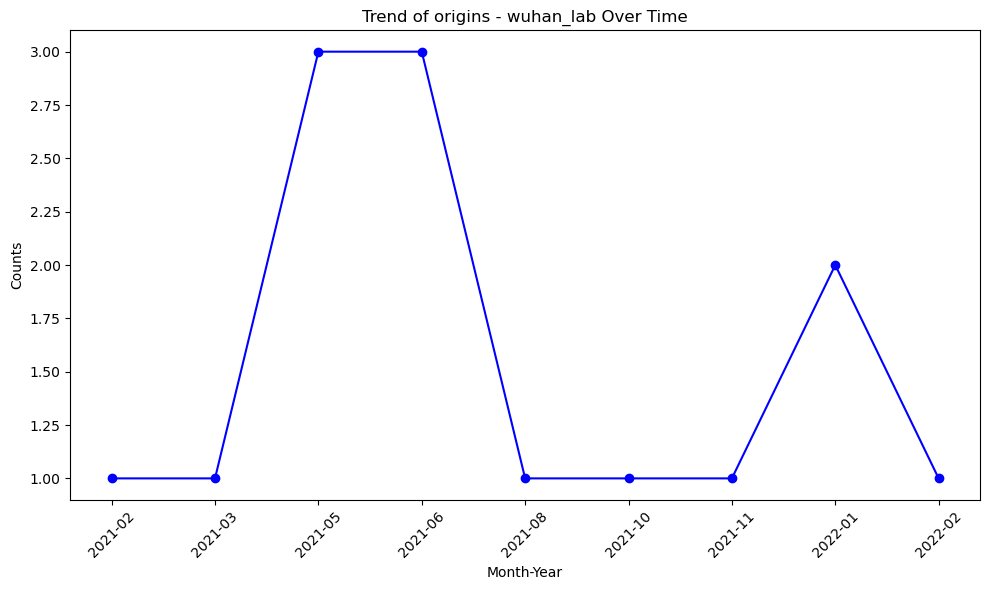

In [118]:
specific_theme = 'origins'
specific_sub_theme = 'wuhan_lab'

# Filter the data for this specific theme and sub-theme
filtered_data = medicine_data_grouped[(medicine_data_grouped['theme'] == specific_theme) &
                                     (medicine_data_grouped['sub-theme'] == specific_sub_theme)]

# Sort by 'year_month'
filtered_data = filtered_data.sort_values(by='year_month')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['year_month'].astype(str), filtered_data['counts'], marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title(f'Trend of {specific_theme} - {specific_sub_theme} Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Show the plot
plt.tight_layout()
plt.show()

### Test Topic Coherence and Topic Diversity

In [119]:
network_organized_data

,topic_words,count,theme,sub-theme
0,sarscov - mutation - variant - evolution - seq...,1430,mutation,general
1,school - kid - child - pediatric - reopen - ki...,801,children,schools
2,mask - wear - cloth - surgical - fit - respira...,747,prevent,ppe
3,ontario - canadians - canada - covidvaccines -...,534,vaccine,canada
4,hesitancy - hesitant - vaccineequity - vaccine...,507,vaccine,hesitancy
...,...,...,...,...
772,crede - clog - bailey - wh - leg - spiking - h...,10,NaN,NaN
773,funny - hilarious - hysterically - true - cuz ...,10,NaN,NaN
774,thomas - justice - ginni - clarence - supreme ...,10,NaN,NaN
775,gdpr - datanumber - decentralise - algorithm -...,10,NaN,NaN
